In [43]:
import pandas as pd
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("epldata_final.csv")
data["fpl_sel"] = data["fpl_sel"].str.replace("%","")
data["fpl_sel"] = pd.to_numeric(data["fpl_sel"])
data["fpl_value"] = pd.to_numeric(data["fpl_value"])
data["fpl_points"] = pd.to_numeric(data["fpl_points"])

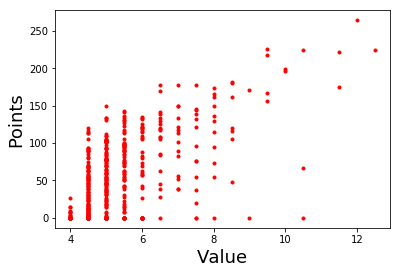

In [44]:
pv = {"Points":data["fpl_points"],"Value":data["fpl_value"]}
df = pd.DataFrame(pv) 
plt.plot(df["Value"],df["Points"], "r.")
plt.xlabel("Value", fontsize=18)
plt.ylabel("Points", fontsize=18)
plt.show()

In [45]:
import numpy as np
from matplotlib import pylab as plt

Y = np.array(df["Points"]).reshape(-1,1)
X = np.array(df["Value"]).reshape(-1,1)

In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=7, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [47]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

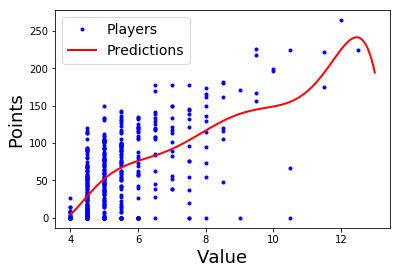

In [48]:
X_new=np.linspace(4, 13, 461).reshape(461, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, Y, "b.", label="Players")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("Value", fontsize=18)
plt.ylabel("Points", fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [49]:
from statsmodels.formula.api import ols
model1 = ols("fpl_points ~ fpl_value", data).fit()
print(model1.summary())
ValueRS = model1.rsquared
model2 = ols("fpl_points ~ page_views", data).fit()
print(model2.summary())
pageRS = model2.rsquared
model3= ols("fpl_points ~ age", data).fit()
print(model3.summary())
ageRS = model3.rsquared
model4 = ols("fpl_points ~ market_value", data).fit()
print(model4.summary())
marketRS = model4.rsquared
model5 = ols("fpl_points ~ fpl_sel", data).fit()
print(model5.summary())
selRS = model5.rsquared

                            OLS Regression Results                            
Dep. Variable:             fpl_points   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     284.9
Date:                Wed, 15 May 2019   Prob (F-statistic):           4.52e-50
Time:                        15:18:53   Log-Likelihood:                -2373.6
No. Observations:                 461   AIC:                             4751.
Df Residuals:                     459   BIC:                             4760.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.6533      8.115     -9.323      0.0

In [50]:
Rsqures ={"Fpl Value":ValueRS,"Page Views":pageRS,"Player Age":ageRS,"Market Value":marketRS,"Selected By":selRS}
for k,v in Rsqures.items():
    print(k,v)

Fpl Value 0.382959069254326
Page Views 0.29426764407090533
Player Age 0.03526333140549376
Market Value 0.3784150983385526
Selected By 0.26729774498185477


In [51]:
for row in data.itertuples():
    mask = (data["fpl_points"] < 50)
    data.loc[mask, 'fpl_points_cat'] = "Very Low"
    mask = (data["fpl_points"] >= 50)
    data.loc[mask, 'fpl_points_cat'] = "Low"
    mask = (data["fpl_points"] >= 100)
    data.loc[mask, 'fpl_points_cat'] = "Modrate"
    mask = (data["fpl_points"] >= 150)
    data.loc[mask, 'fpl_points_cat'] = "High"
    mask = (data["fpl_points"] >= 200)
    data.loc[mask, 'fpl_points_cat'] = "Very High"
data.head()
    

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing,fpl_points_cat
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.1,264,3.0,Chile,0,4,1,1,0,Very High
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.6,167,2.0,Germany,0,4,1,1,0,High
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.9,134,2.0,Czech Republic,0,6,1,1,0,Modrate
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.5,122,1.0,England,0,4,1,1,0,Modrate
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.7,121,2.0,France,0,4,1,1,0,Modrate


In [ ]:
for row in data.itertuples():
    ##Defenders
    mask = (data["position"] == "CB" )
    data.loc[mask, 'player_type'] = "Defender"
    mask = (data["position"] == "RB" )
    data.loc[mask, 'player_type'] = "Defender"
    mask = (data["position"] == "LB" )
    data.loc[mask, "player_type"] = "Defender"
    ##Midfielders
    mask = (data["position"] == "DM" )
    data.loc[mask, "player_type"] = "Midfielder"
    mask = (data["position"] == "CM" )
    data.loc[mask, "player_type"] = "Midfielder"
    mask = (data["position"] == "AM" )
    data.loc[mask, "player_type"] = "Midfielder"
    mask = (data["position"] == "RM" )
    data.loc[mask, "player_type"] = "Midfielder"
    mask = (data["position"] == "LM" )
    data.loc[mask, "player_type"] = "Midfielder"
    mask = (data["position"] == "RW" )
    data.loc[mask, "player_type"] = "Midfielder"
    mask = (data["position"] == "LW" )
    data.loc[mask, "player_type"] = "Midfielder"
    ##Attackers
    mask = (data["position"] == "SS" )
    data.loc[mask, "player_type"] = "Attacker"
    mask = (data["position"] == "CF" )
    data.loc[mask, "player_type"] = "Attacker"
    ##GoalKeepers
    mask = (data["position"] == "GK" )
    data.loc[mask, "player_type"] = "GoalKeeper"
data

In [ ]:
sns.pairplot(data, vars=['fpl_points','fpl_value','age','page_views','market_value','fpl_sel'], kind="reg", hue="player_type")

In [ ]:
sns.pairplot(data, vars=['fpl_points','fpl_value','age','page_views','market_value','fpl_sel'], kind="reg", hue="fpl_points_cat")

In [ ]:
mask = (data["player_type"] == "Attacker" )
model = ols("fpl_points ~ fpl_value",data.loc[mask]).fit()
print(model.summary())

In [ ]:
mask = (data["player_type"] == "Midfielder" )
model = ols("fpl_points ~ fpl_value",data.loc[mask]).fit()
print(model.summary())

In [ ]:
mask = (data["player_type"] == "Defender" )
model = ols("fpl_points ~ fpl_value",data.loc[mask]).fit()
print(model.summary())
data.head()

Player Search GUI

In [ ]:
from tkinter import *

root = Tk()
root.geometry("700x400")
root.title("INST 326 Player Filter")

playerTypeList = []
pointTotalList = []
nationList = []

for p in data["player_type"]:
    if p not in playerTypeList:
        playerTypeList.append(p)
        
for p in data["fpl_points_cat"]:
    if p not in pointTotalList:
        pointTotalList.append(p)

for n in data["nationality"]:
    if n not in nationList:
        nationList.append(n)
        
playerTypeList.append("Any")
pointTotalList.append("Any")
nationList.append("Any")
        
playerTypeList.sort()
pointTotalList.sort()
nationList.sort()

def getplayers():
 
    playerType = ply.get()
    pointTotal = pointT.get()
    nation = nat.get()
    value = val.get()
    sizeC = clubsize.get()
    
    if sizeC == 1: 
        sizeC = ""
    elif sizeC == 2:
        sizeC = 1
    else:
        sizeC = 0

    if playerType == "Any":
        players = data
    else:
        players = data[data.player_type == playerType]
    if pointTotal == "Any":
        players = players
    else:
        players = players[players.fpl_points_cat == pointTotal]
    if nation == "Any":
        players=players
    else:
        players = players[players.nationality == nation]
    players = players[players.fpl_points >= value]
    if sizeC == 1:
        players = players[players.big_club == 1]
    elif sizeC == 0:
        players = players[players.big_club == 0]
    else:
        players = players
    
    if players.empty:
        print("Sorry there are no players that match your search criteria \nPlease try again")
    else:
        print(players)
    
    

ply = StringVar()
ply.set(playerTypeList[0])
pointT = StringVar()
pointT.set(pointTotalList[0])
nat = StringVar()
nat.set(nationList[1])
val = IntVar()
clubsize = IntVar()
    
label1 = Label(root,text="Player Type")
label1.grid(row=0,column =2)
set1 = OptionMenu(root,ply,*playerTypeList)
set1.configure(font=("Arial", 25))
set1.grid(row=1,column=2)

labelint = Label(root,text="Total Points Category").grid(row=3, column=2)
dropint = OptionMenu(root,pointT,*pointTotalList)
dropint.configure(font=("Arial", 15))
dropint.grid(row=4,column=2)

labelint = Label(root,text="Nationality").grid(row=6, column=2)
dropint = OptionMenu(root,nat,*nationList)
dropint.configure(font=("Arial", 15))
dropint.grid(row=7,column=2)

labelAAr = Label(root,text="Minimum Player Value").grid(row = 9, column =2)
SliderAAR = Scale(root,orient=HORIZONTAL,length=400,sliderlength =20,from_=0.0,to=13.0, variable = val, tickinterval=1)
SliderAAR.grid(row=10, column=2)

radAll = Radiobutton(root,text="All Player",variable=clubsize,value=1,font=("Arial",9)).grid(row=11, column=1)
radBig = Radiobutton(root,text="Players from Big Clubs",variable=clubsize,value=2, font=("Arial",9)).grid(row=11, column=2)
radSmall = Radiobutton(root,text="Players from Small Clubs",variable=clubsize,value=3,font=("Arial",9)).grid(row=11, column=3)

findbutton = Button(root, text="Find Players", command=getplayers).grid(row=12, column=2)

root.mainloop()
    